## GRIP - Data Science & Business Analytics



## Task 1: Prediction using Decision Tree Algorithm

### Author : Naveen B

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [2]:
data=pd.read_csv("Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Descriptive Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# All variables in the dataset are numerical except for the dependent variable

In [6]:
#Five-Number Summary
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [7]:
data.drop("Id",axis=1,inplace=True) #Dropping unique indentifier

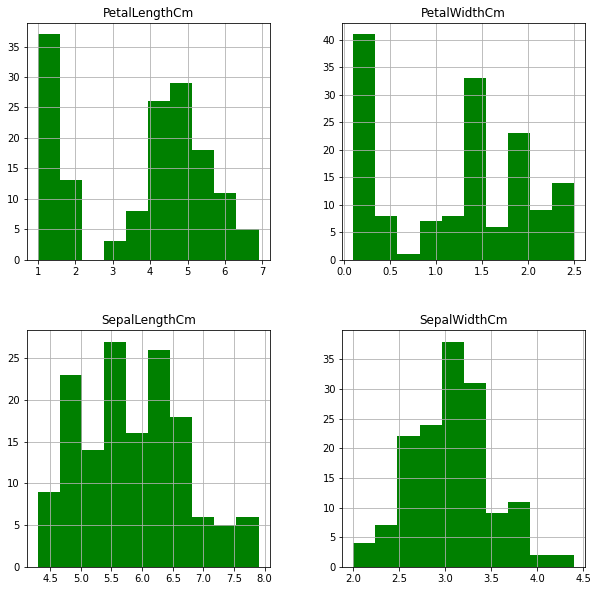

In [8]:
data.hist(figsize=(10,10),color="g"); #Distribution of independent Variables

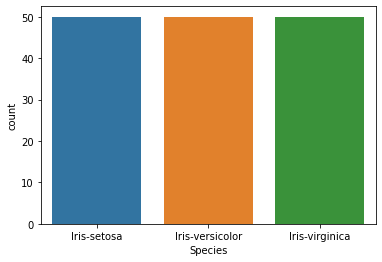

In [9]:
sns.countplot(data.Species); # Count of class of dependent variable 

In [10]:
data.Species.value_counts(normalize=True) #Balanced dataset

Iris-virginica     0.333333
Iris-versicolor    0.333333
Iris-setosa        0.333333
Name: Species, dtype: float64

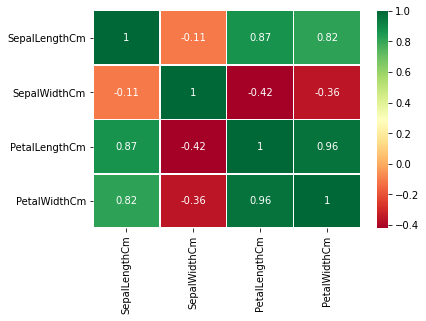

In [11]:
sns.heatmap(data.corr(),annot=True,linewidths=0.5,cmap="RdYlGn"); #Correlation of independant Variables

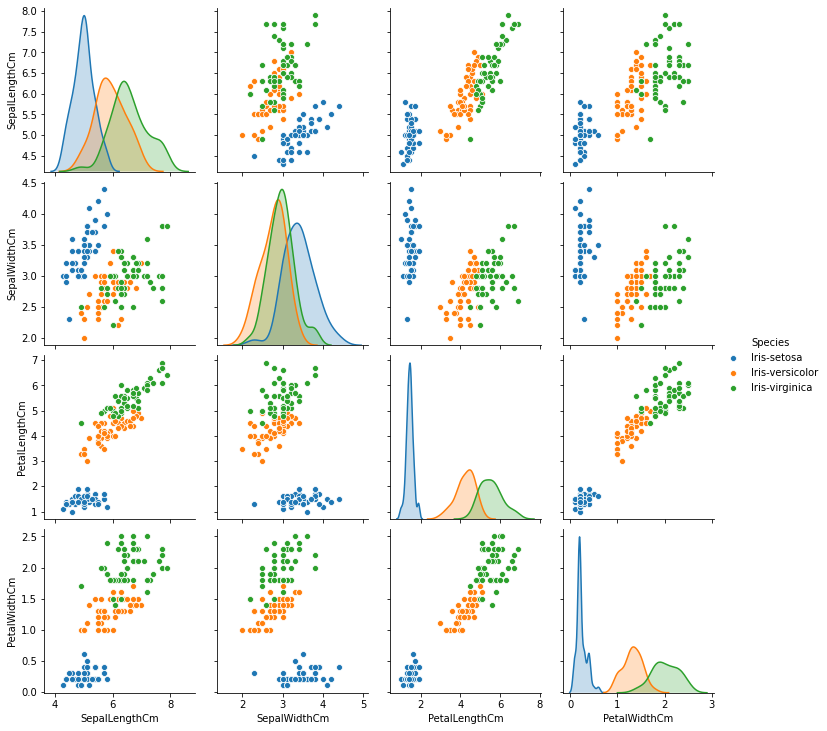

In [12]:
sns.pairplot(data,hue="Species");

In [13]:
#Splitting dataset into dependent and Independent Varaiable
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [14]:
#Splitting dataset into Train and Test set with random state 14
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=14)

### Model Building

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt=DecisionTreeClassifier(max_depth=2)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Plotting the tree

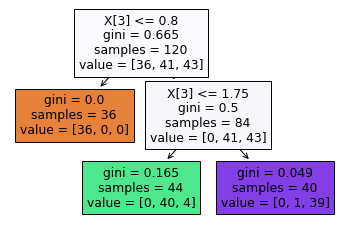

In [16]:
tree.plot_tree(dt,filled=True);

### Model Evaluation

In [17]:
print("Accuracy of Train set : {}%".format(dt.score(X_train,y_train)*100))
print("Accuracy of Test set : {}%".format(dt.score(X_test,y_test)*100))

Accuracy of Train set : 95.83333333333334%
Accuracy of Test set : 96.66666666666667%


In [18]:
# Model is Generalized i.e Low Bias and Low Variance

In [19]:
from sklearn.metrics import confusion_matrix,classification_report

Text(33.0, 0.5, 'Actual Label')

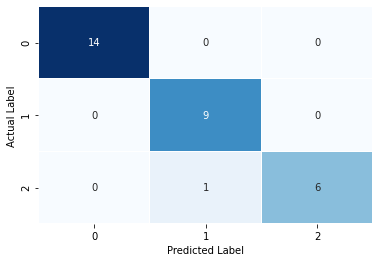

In [20]:
sns.heatmap(confusion_matrix(y_test,dt.predict(X_test)),annot=True,linewidths=.3,cmap=plt.cm.Blues,cbar=False);
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

In [21]:
print(classification_report(y_test,dt.predict(X_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.86      0.92         7

       accuracy                           0.97        30
      macro avg       0.97      0.95      0.96        30
   weighted avg       0.97      0.97      0.97        30

